In [1]:
import numpy as np
import numpy.typing as nptyping
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

## `square_simple`

In [2]:
square_train = pd.read_csv('data/regression/square-simple-training.csv').drop(columns='Unnamed: 0')
square_test = pd.read_csv('data/regression/square-simple-test.csv').drop(columns='Unnamed: 0')

In [3]:
print(square_train.shape)
print(square_test.shape)

(100, 2)
(100, 2)


In [4]:
square_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
square_train.describe()

,x,y
count,100.000000,100.000000
mean,0.335393,-30.558884
std,1.001218,96.260228
min,-1.499164,-129.988852
25%,-0.461426,-107.395163
50%,0.494938,-67.036576
75%,1.108129,37.700438
max,1.939860,208.675181


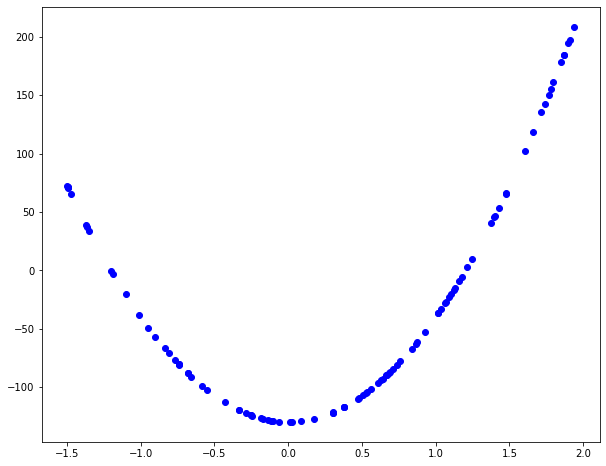

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(square_train['x'], square_train['y'], color='blue')
plt.show()

Convert data to column arrays to prevent errors when predicting:

In [7]:
x_square_train = square_train['x'].to_numpy().reshape((-1, 1))
y_square_train = square_train['y'].to_numpy().reshape((-1, 1))
x_square_test = square_test['x'].to_numpy().reshape((-1, 1))
y_square_test = square_test['y'].to_numpy().reshape((-1, 1))

## `steps_small`

In [8]:
steps_train = pd.read_csv('data/regression/steps-small-training.csv').drop(columns='Unnamed: 0')
steps_test = pd.read_csv('data/regression/steps-small-test.csv').drop(columns='Unnamed: 0')

In [9]:
print(steps_train.shape)
print(steps_test.shape)

(50, 2)
(50, 2)


In [10]:
steps_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


In [11]:
steps_train.describe()

,x,y
count,50.000000,50.000000
mean,0.264074,16.000000
std,0.977484,80.812204
min,-1.257671,-80.000000
25%,-0.588399,-80.000000
50%,0.199583,0.000000
75%,1.100537,80.000000
max,1.993418,160.000000


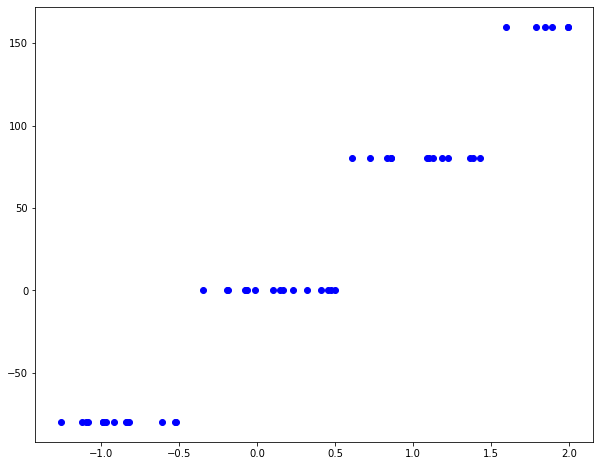

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(steps_train['x'], steps_train['y'], color='blue')
plt.show()

In [13]:
steps_train['y'].value_counts()

 0      16
-80     15
 80     13
 160     6
Name: y, dtype: int64

Convert data to column arrays to prevent errors when predicting:

In [14]:
x_steps_train = steps_train['x'].to_numpy().reshape((-1, 1))
y_steps_train = steps_train['y'].to_numpy().reshape((-1, 1))
x_steps_test = steps_test['x'].to_numpy().reshape((-1, 1))
y_steps_test = steps_test['y'].to_numpy().reshape((-1, 1))

## `multimodal_large`

In [15]:
multimodal_train = pd.read_csv('data/regression/multimodal-large-training.csv')
multimodal_test = pd.read_csv('data/regression/multimodal-large-test.csv')

In [16]:
print(multimodal_train.shape)
print(multimodal_test.shape)

(10000, 2)
(1000, 2)


In [17]:
multimodal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [18]:
multimodal_train.describe()

,x,y
count,10000.000000,10000.000000
mean,0.231035,13.429036
std,1.010842,71.956903
min,-1.499971,-99.014346
25%,-0.663674,-56.540303
50%,0.236202,7.663494
75%,1.101647,97.053908
max,1.999974,100.299997


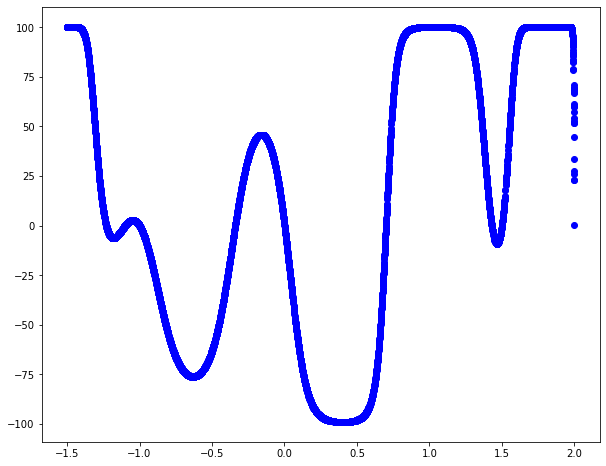

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(multimodal_train['x'], multimodal_train['y'], color='blue')
plt.show()

Convert data to column arrays to prevent errors when predicting:

In [20]:
x_multimodal_train = multimodal_train['x'].to_numpy().reshape((-1, 1))
y_multimodal_train = multimodal_train['y'].to_numpy().reshape((-1, 1))
x_multimodal_test = multimodal_test['x'].to_numpy().reshape((-1, 1))
y_multimodal_test = multimodal_test['y'].to_numpy().reshape((-1, 1))

# Utility functions

## Sigmoid activation function

In [21]:
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

## Sigmoid derivative

In [22]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

## Mean squared error

In [23]:
def mse(actual: nptyping.NDArray, predicted: nptyping.NDArray) -> float:
    n = len(actual)
    return (1/n) * np.sum((actual - predicted)**2)

# MLP implementation

In [24]:
from numpy.random import Generator, PCG64
from typing import Callable

In [25]:
class MLP:
    __slots__ = ['input_size', 'output_size', 'hidden_layers_sizes', 'activation_func', 'activation_func_deriv', 'out_func', 'weights', 'biases',
                 '__normalise', '__normalise_max_x', '__normalise_min_x', '__normalise_max_y', '__normalise_min_y']

    def __init__(self, input_size: int, hidden_layers_sizes: list[int], output_size: int):
        self.input_size = input_size
        self.hidden_layers_sizes = hidden_layers_sizes
        self.output_size = output_size
        self.activation_func = sigmoid
        self.activation_func_deriv = sigmoid_derivative
        self.out_func = lambda x: x  # linear
        self.__set_default_weights()
        self.__normalise = False
    
    def __set_default_weights(self, rng: Generator = None):
        self.weights = []
        self.biases = []

        if rng is None:
            rng = Generator(PCG64())

        # weigths are taken from normal distribution by default
        layers_sizes = [self.input_size, *self.hidden_layers_sizes, self.output_size]
        for i in range(len(layers_sizes) - 1):
            self.weights.append(
                rng.uniform(size=(layers_sizes[i], layers_sizes[i + 1]))
            )
        
        # biases are 0 by default
        for layer_size in layers_sizes[1:]:
            self.biases.append(
                np.zeros((1, layer_size))
            )

    @property
    def layers_count(self) -> int:
        return len(self.weights) + 1
    
    def visualise(self):
        for i, weights, biases in zip(range(self.layers_count - 1), self.weights, self.biases):
            # concatenating weights & biases
            weights = weights.reshape(len(biases[0]), -1)
            biases = biases.reshape(-1, 1)
            layer = np.concatenate([weights, biases], axis=1)

            # plotting layer values on a heatmap
            plt.subplot(1, self.layers_count - 1, i + 1)
            sns.heatmap(layer, cmap='BrBG', annot=True)
            plot_title = f'Hidden layer {i}'
            if i == 0:
                plot_title = 'Input layer'
            elif i == self.layers_count - 2:
                plot_title = 'Output layer'
            plt.title(plot_title)
        plt.show()
            
    
    def __feedforward(self, x: nptyping.NDArray) -> tuple[list[nptyping.NDArray], list[nptyping.NDArray]]:
        """
        Computes and returns the values in every layer from before and after activation

        :return: A two-element tuple, where the first element is a list of values before activation,
                 and the second is a list of values after activation
        """
        prev_a = x
        z = []
        a = [x]

        for weights, biases in zip(self.weights[:-1], self.biases[:-1]):
            a_k = (prev_a @ weights) + biases
            z.append(a_k)
            prev_a = self.activation_func(a_k)
            a.append(prev_a)
        # the last iteration uses a different activation function (linear)
        a_k = (prev_a @ self.weights[-1]) + self.biases[-1]
        z.append(a_k)
        prev_a = self.out_func(a_k)
        a.append(prev_a)
        return z, a
    
    def __backpropagate(self, y: nptyping.NDArray, 
                        z: list[nptyping.NDArray], 
                        a: list[nptyping.NDArray]) -> tuple[list[nptyping.NDArray], list[nptyping.NDArray]]:
        """
        Performs backpropagation and returns weights and biases deltas

        :param z: values before activation
        :param a: values after activation
        :return: A tuple, where the first element is the weights_delta and the second one is the biases_delta
        """
        # initialise deltas to 0
        weights_delta = [np.zeros(w.shape) for w in self.weights]
        biases_delta = [np.zeros(b.shape) for b in self.biases]

        y_pred = a[-1]
        e_k = (y_pred - y) * self.activation_func_deriv(z[-1])
        weights_delta[-1] = a[-2].T @ e_k
        biases_delta[-1] = e_k
        
        for k in range(2, self.layers_count):  
            e_k = self.activation_func_deriv(z[-k]) * (self.weights[-k+1] @ e_k.T).T
            weights_delta[-k] = a[-k-1].T @ e_k
            biases_delta[-k] = e_k
        
        return weights_delta, biases_delta
        
    
    def predict(self, x: nptyping.NDArray) -> nptyping.NDArray:
        # normalisation
        if self.__normalise:
            x = (x - self.__normalise_min_x) / (self.__normalise_max_x - self.__normalise_min_x)
            
        # prediction
        _, activations = self.__feedforward(x)
        y = activations[-1]

        # denormalisation
        if self.__normalise:
            y = y * (self.__normalise_max_y - self.__normalise_min_y) + self.__normalise_min_y

        return y
    
    def train(self, x_train: nptyping.NDArray, y_train: nptyping.NDArray, 
              epochs: int = 1000, learning_rate: float | Callable = 0.001, 
              batch_size: int = 1, normalise: bool = False, 
              return_weights_updates: bool = False, plot_mse: bool = False,
              random_state: int | None = None, verbose: bool = False) -> None | dict[str, list[nptyping.NDArray]]:
        """
        Attempts to find optimal weights & biases for the network

        :param learning_rate:          a learning_rate coefficient. Can be either a number or a function that takes the epoch 
                                       number as an argument and returns a float
        :param normalise:              whether to normalise the data before the training (if set to true, the model will also 
                                       normalise & denormalise data when predicting new values when using the predict() method)
        :param return_weights_updates: whether or not to return weights & biases evolution
        :param random_state:           a seed passed to a random number generation (affects the randomness of generating batches)
        :param plot_mse:               whether to plot MSE values per epoch after the training
        :param verbose:                whether to print the current epoch number every 500th epoch

        :return: if return_weights_updates is set to True, this will return a dictionary containing lists that contain
                 weights & biases from after every 10th epoch. Otherwise, nothing is returned
        """
        # random_state for reproducibility
        if random_state is not None:
            if type(random_state) is str:
                random_state = np.sum([ord(c) for c in random_state])
            rng = Generator(PCG64(random_state))
        else:
            rng = Generator(PCG64())

        # find the batch count
        batch_count = len(y_train) // batch_size
        
        # reset weights
        self.__set_default_weights(rng)

        # normalisation
        x_pre_normalisation = x_train
        y_pre_normalisation = y_train

        self.__normalise = normalise
        if normalise:
            self.__normalise_max_x = np.max(x_train)
            self.__normalise_min_x = np.min(x_train)
            self.__normalise_max_y = np.max(y_train)
            self.__normalise_min_y = np.min(y_train)
            x_train = (x_train - self.__normalise_min_x) / (self.__normalise_max_x - self.__normalise_min_x)
            y_train = (y_train - self.__normalise_min_y) / (self.__normalise_max_y - self.__normalise_min_y)

        # weights & biases after every 10th epoch
        weights_updates = {
            'weights': [self.weights.copy()],
            'biases': [self.biases.copy()],
        }
        # train mse after every epoch
        mse_history = [mse(y_pre_normalisation, self.predict(x_pre_normalisation))]

        # adjusting weights & biases using backpropagation
        for epoch in range(epochs):
            # set the learning rate
            if type(learning_rate) is float or type(learning_rate) is int:
                lr = learning_rate
            else:
                lr = learning_rate(epoch)
            
            # generate batches
            train_xy_pairs = np.array(list(zip(x_train, y_train)))
            rng.shuffle(train_xy_pairs)
            batches = np.array_split(train_xy_pairs, batch_count)

            # iterate over batches
            for batch in batches:
                # initialise deltas to 0
                weights_delta_batch = [np.zeros(w.shape) for w in self.weights]
                biases_delta_batch = [np.zeros(b.shape) for b in self.biases]

                for x, y in batch:
                    # FeedForward
                    # z - values before activation
                    # a - values after activation
                    z, a = self.__feedforward(x)

                    # Backpropagate
                    weights_delta, biases_delta = self.__backpropagate(y, z, a)

                    # updating deltas
                    weights_delta_batch = [w + delta for w, delta in zip(weights_delta_batch, weights_delta)]
                    biases_delta_batch = [b + delta for b, delta in zip(biases_delta_batch, biases_delta)] 

                # updating weights
                self.weights = [w - lr * delta / len(batch) 
                                for w, delta in zip(self.weights, weights_delta_batch)]
                self.biases = [b - lr * delta / len(batch) 
                               for b, delta in zip(self.biases, biases_delta_batch)]

            # saving mse
            mse_history.append(mse(y_pre_normalisation, self.predict(x_pre_normalisation)))

            # saving new weights (every 10th epoch)
            if return_weights_updates and epoch % 10 == 0:
                weights_updates['weights'].append(self.weights.copy())
                weights_updates['biases'].append(self.biases.copy())
            
            # printing the progress every 100th epoch
            if verbose and (epoch + 1) % 100 == 0:
                mse_val = mse(y_pre_normalisation, self.predict(x_pre_normalisation))
                print(f'Epoch {epoch + 1}/{epochs} done | MSE = {mse_val:.2f}')

        min_mse = np.min(mse_history)
        min_mse_epoch = mse_history.index(min_mse)
        print(f'Minimal MSE: {min_mse} (epoch {min_mse_epoch})')
        print(f'Final MSE: {mse(y_pre_normalisation, self.predict(x_pre_normalisation))}')
        
        if plot_mse:
            plt.figure(figsize=(10, 8))
            # plotting values from initial epoch will make the plot unreadable due to the y-axis scale
            # (high values at the start make the right side of the plot look like a flat line)
            # to balance it out, the plot will start from the first epoch where the MSE value was
            # lower than the 3rd quartile of the entire mse_history array
            mse_3rd_quartile = np.percentile(mse_history, 75)
            first_epoch_lt_3q = np.argmax(mse_history < mse_3rd_quartile)

            plt.plot(list(range(first_epoch_lt_3q, epochs + 1)), mse_history[first_epoch_lt_3q:])
            plt.ylabel('MSE')
            plt.xlabel('Epoch')
            plt.show()
                
        if return_weights_updates:
            return weights_updates

# Weights visualisation example

In [26]:
mlp_default = MLP(1, [5, 5], 1)

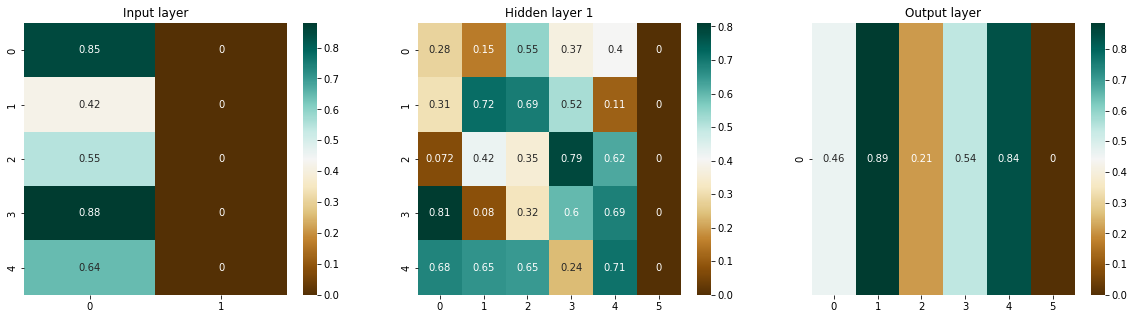

In [27]:
plt.figure(figsize=(20, 5))
mlp_default.visualise()

# Models training 

## `square_simple`

In [28]:
mlp_square = MLP(1, [5], 1)

Minimal MSE: 1.7987330512909174 (epoch 99997)
Final MSE: 1.7987893562021717


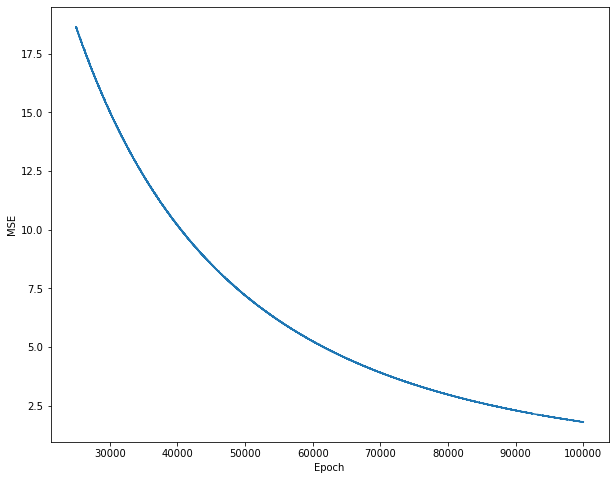

In [29]:
mlp_square.train(
    x_square_train, y_square_train, 
    epochs=100000, learning_rate=0.05, 
    batch_size=4, normalise=True, plot_mse=True,
    random_state=2,
)

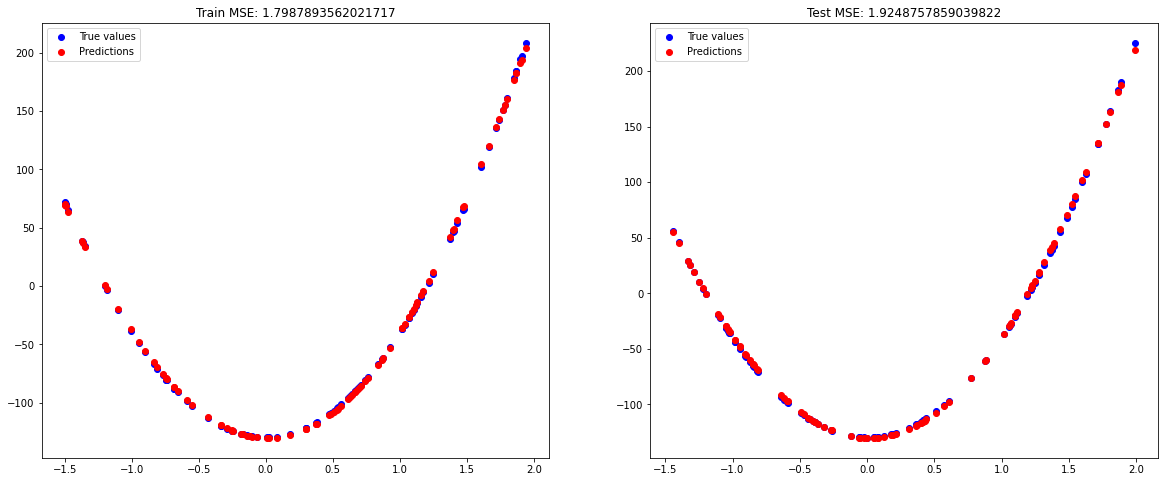

In [30]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_square_train, y_square_train, color='blue', label='True values')
plt.scatter(x_square_train, mlp_square.predict(x_square_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_square_train, mlp_square.predict(x_square_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_square_test, y_square_test, color='blue', label='True values')
plt.scatter(x_square_test, mlp_square.predict(x_square_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_square_test, mlp_square.predict(x_square_test))}')
plt.legend()

plt.show()

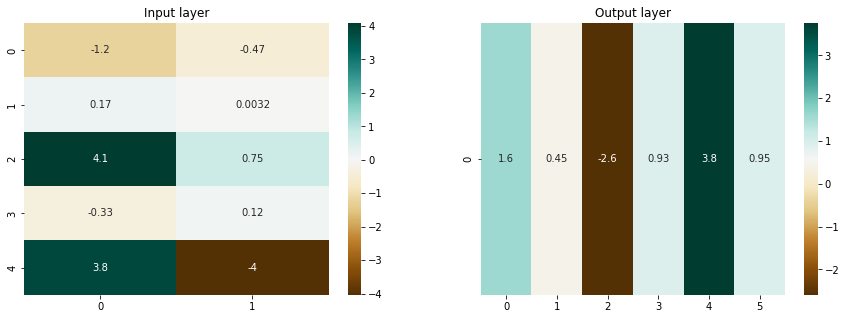

In [38]:
plt.figure(figsize=(15, 5))
mlp_square.visualise()

## `steps_small`

In [32]:
mlp_steps = MLP(1, [10, 10], 1)

Epoch 100/1000000 done | MSE = 397.75
Epoch 200/1000000 done | MSE = 379.42
Epoch 300/1000000 done | MSE = 596.83
Epoch 400/1000000 done | MSE = 471.00
Epoch 500/1000000 done | MSE = 362.98
Epoch 600/1000000 done | MSE = 989.20
Epoch 700/1000000 done | MSE = 402.15
Epoch 800/1000000 done | MSE = 363.70
Epoch 900/1000000 done | MSE = 442.44
Epoch 1000/1000000 done | MSE = 743.12
Epoch 1100/1000000 done | MSE = 483.94
Epoch 1200/1000000 done | MSE = 363.06
Epoch 1300/1000000 done | MSE = 370.19
Epoch 1400/1000000 done | MSE = 617.58
Epoch 1500/1000000 done | MSE = 364.31
Epoch 1600/1000000 done | MSE = 368.71
Epoch 1700/1000000 done | MSE = 363.35
Epoch 1800/1000000 done | MSE = 377.19
Epoch 1900/1000000 done | MSE = 882.15
Epoch 2000/1000000 done | MSE = 362.57
Epoch 2100/1000000 done | MSE = 367.38
Epoch 2200/1000000 done | MSE = 422.22
Epoch 2300/1000000 done | MSE = 372.70
Epoch 2400/1000000 done | MSE = 364.47
Epoch 2500/1000000 done | MSE = 396.70
Epoch 2600/1000000 done | MSE = 42

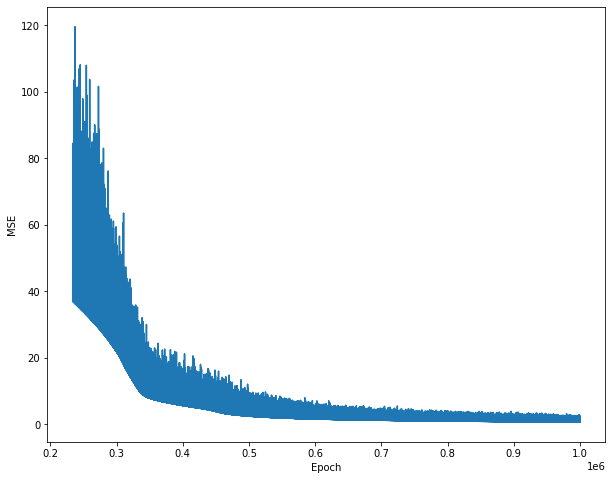

In [33]:
mlp_steps.train(
    x_steps_train, y_steps_train, 
    epochs=1_000_000, learning_rate=0.8, 
    batch_size=1, normalise=True, plot_mse=True,
    random_state='abc', verbose=True,
)

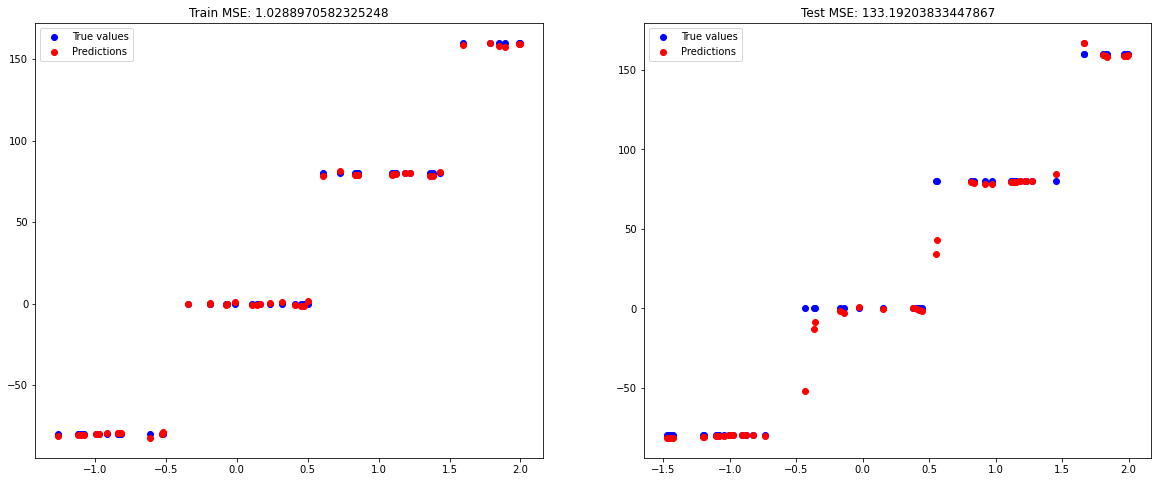

In [34]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_steps_train, y_steps_train, color='blue', label='True values')
plt.scatter(x_steps_train, mlp_steps.predict(x_steps_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_steps_train, mlp_steps.predict(x_steps_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_steps_test, y_steps_test, color='blue', label='True values')
plt.scatter(x_steps_test, mlp_steps.predict(x_steps_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_steps_test, mlp_steps.predict(x_steps_test))}')
plt.legend()

plt.show()

Let's investigate the difference between train and test datasets for steps_small:

In [35]:
steps_train_edges = pd.concat([
    steps_train.groupby('y').min(), 
    steps_train.groupby('y').max()
])
steps_train_edges.reset_index(inplace=True)
steps_train_edges.sort_values(by=['y', 'x'], inplace=True)

steps_test_edges = pd.concat([
    steps_test.groupby('y').min(), 
    steps_test.groupby('y').max()
])
steps_test_edges.reset_index(inplace=True)
steps_test_edges.sort_values(by=['y', 'x'], inplace=True)

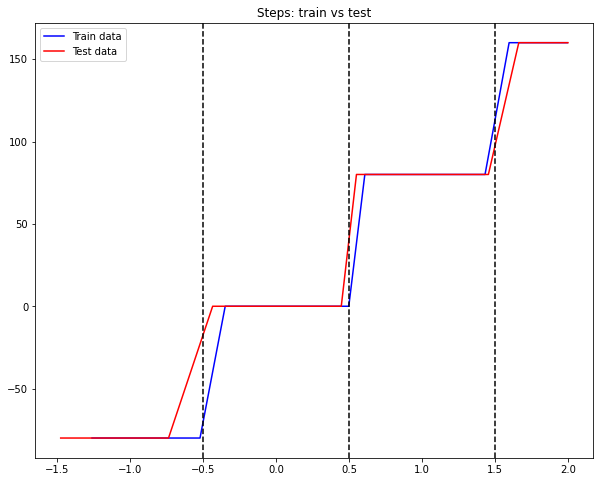

In [36]:
plt.figure(figsize=(10, 8))
# train steps edges
plt.plot('x', 'y', '', data=steps_train_edges, color='blue', label='Train data')
# test steps edges
plt.plot('x', 'y', '', data=steps_test_edges, color='red', label='Test data')
# actual step edges
plt.axvline(x=-0.5, color='black', linestyle='--')
plt.axvline(x=0.5, color='black', linestyle='--')
plt.axvline(x=1.5, color='black', linestyle='--')

plt.title(f'Steps: train vs test')
plt.legend()
plt.show()

Due to the train dataset being too small, it is not clear where exactly each step starts and ends.
Steps edges differ significantly between both datasets.
That is why the model that is fitted to the train data doesn't perform well on the test data.

## `multimodal_large`

In [31]:
mlp_multimodal = MLP(1, [5, 5], 1)

Epoch 1000/25000 done
Epoch 2000/25000 done
Epoch 3000/25000 done
Epoch 4000/25000 done
Epoch 5000/25000 done
Epoch 6000/25000 done
Epoch 7000/25000 done
Epoch 8000/25000 done
Epoch 9000/25000 done
Epoch 10000/25000 done
Epoch 11000/25000 done
Epoch 12000/25000 done
Epoch 13000/25000 done
Epoch 14000/25000 done
Epoch 15000/25000 done
Epoch 16000/25000 done
Epoch 17000/25000 done
Epoch 18000/25000 done
Epoch 19000/25000 done
Epoch 20000/25000 done
Epoch 21000/25000 done
Epoch 22000/25000 done
Epoch 23000/25000 done
Epoch 24000/25000 done
Epoch 25000/25000 done
Minimal MSE: 29.532680794082932 (epoch 24993)
Final MSE: 30.00357136433311


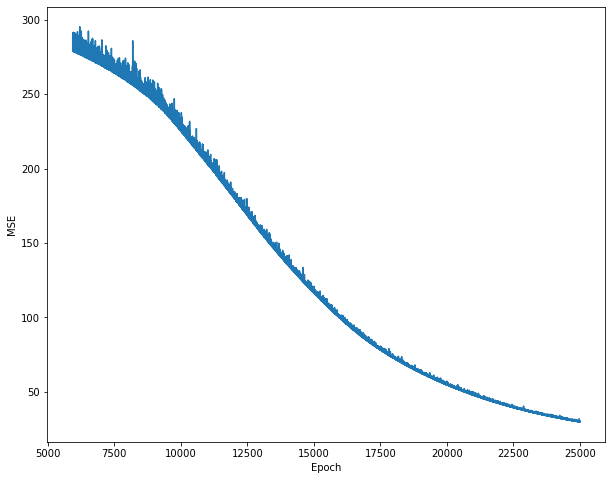

In [128]:
mlp_multimodal.train(
    x_multimodal_train, y_multimodal_train, 
    epochs=25000, learning_rate=0.2, 
    batch_size=10, normalise=True, plot_mse=True,
    random_state=2, verbose=True,
)

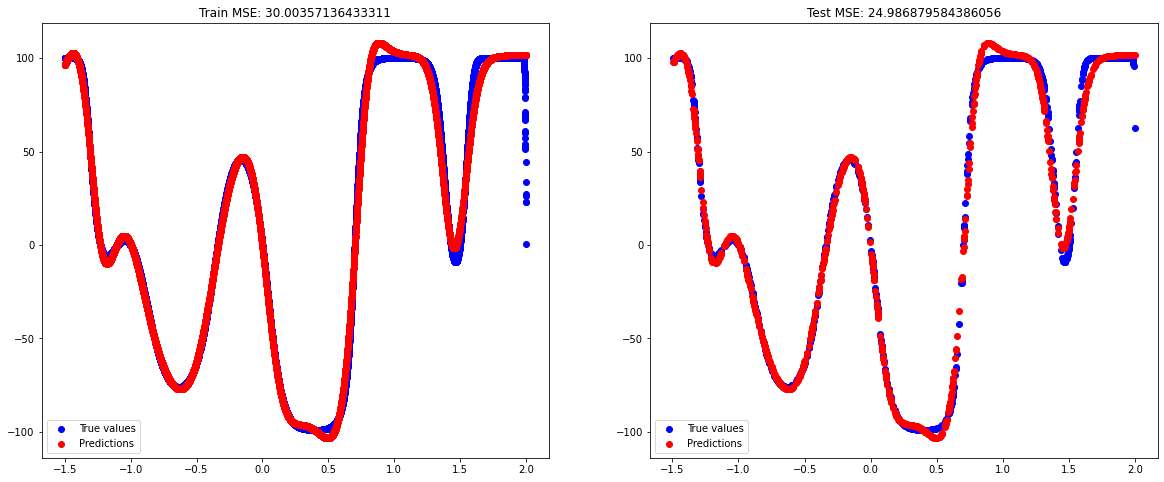

In [129]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_multimodal_train, y_multimodal_train, color='blue', label='True values')
plt.scatter(x_multimodal_train, mlp_multimodal.predict(x_multimodal_train), color='red', label='Predictions')
plt.title(f'Train MSE: {mse(y_multimodal_train, mlp_multimodal.predict(x_multimodal_train))}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_multimodal_test, y_multimodal_test, color='blue', label='True values')
plt.scatter(x_multimodal_test, mlp_multimodal.predict(x_multimodal_test), color='red', label='Predictions')
plt.title(f'Test MSE: {mse(y_multimodal_test, mlp_multimodal.predict(x_multimodal_test))}')
plt.legend()

plt.show()